# (B) Bound case

In [9]:
# This cell runs the file "Orbital_functions_n.ipynb" such that the functions in that file can be utillized here
%run ./Orbital_functions_n.ipynb

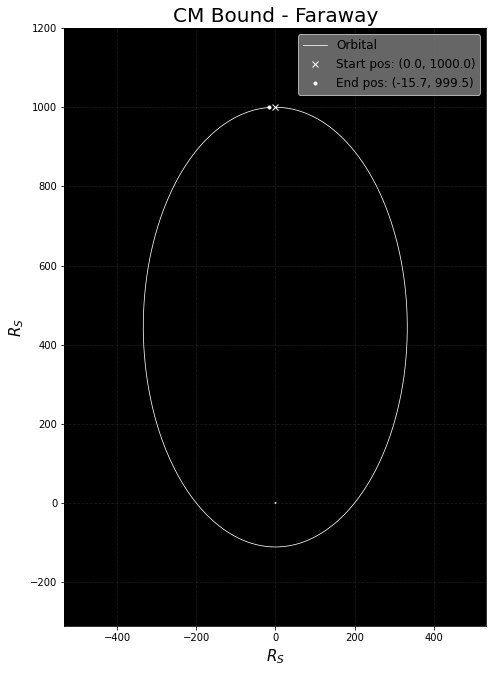

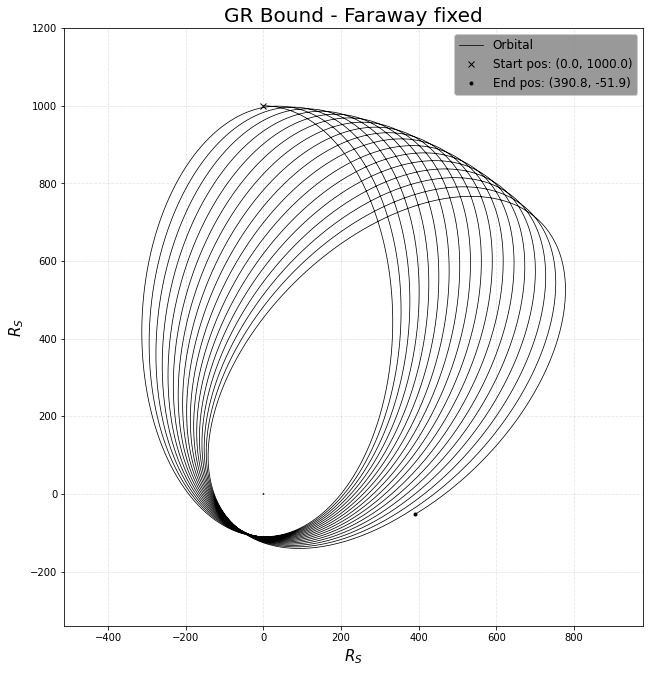

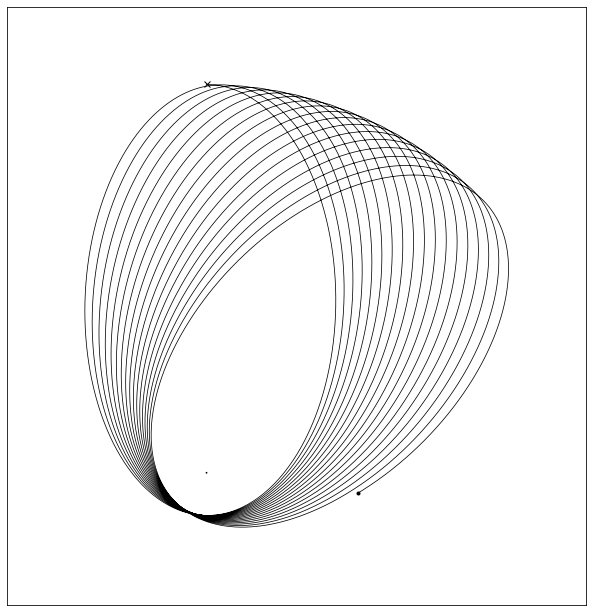

In [10]:

# # CM Bound orbital, close starting pos
# s2 = [0,10,0.2,0]
# pos2 = orbitals(s2, GR = False,t_max = 2000)[0]
# orbPlot2 = orbPlotter(pos2,'CM Bound - Close')

# CM Bound orbital, faraway starting pos
s1 = [0,1000,0.01,0]
pos1 = orbitals(s1, GR = False,t_max = 115000)[0]
orbPlot1 = orbPlotter(pos1,'CM Bound - Faraway', save = False)

# # GR bound orbital, close starting pos
# s2 = [0,10,0.2,0]
# pos2 = orbitals(s2, GR = True,t_max = 2000)[0]
# orbPlot2 = orbPlotter(pos2,'GR Bound - Close', GR = True)

# GR bound orbital, faraway starting pos
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, t_max = 2027500, dt=100)[0]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway fixed', GR = True)
prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway fixed', GR = True, save=True)

# # GR bound orbital, faraway starting pos, one round
# s2 = [0,1000,0.01,0]
# pos2 = orbitals(s2, GR = True, t_max = 112000)[0]
# orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True)
# # prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway (pretty)', GR = True)

## Checking whether GR reduces to CM
We check by checking whether the parameters of the ellipse of the first round trip in the GR case mathces the ellipse of the CM case.

It should be said that throughout this we assume the following:
1. The motion of the first round trip is an ellipse in both cases.
2. That the line going through the points $(x_1, max(y))$ and $(x_2, min(y))$ is perfectly vertical (that is $x_1 = x_2$).
3. That the line going through the points $(max(x), y_1)$ and $(min(x), y_2)$ is perfectly horizontal (that is $y_1 = y_2$).

We check the semi-major and -minor axis $a$ and $b$ by finding the distances between the points mentioned above

$$a = \frac{|| (x_1, \max(y)) - (x_2, \min(y)) ||}{2},$$

and similarly for the semi-minor axis $b$

$$b = \frac{|| (\max(x), y_1) - (\min(x), y_2) ||}{2}.$$

δa = 0.57128, δb = 10.42019


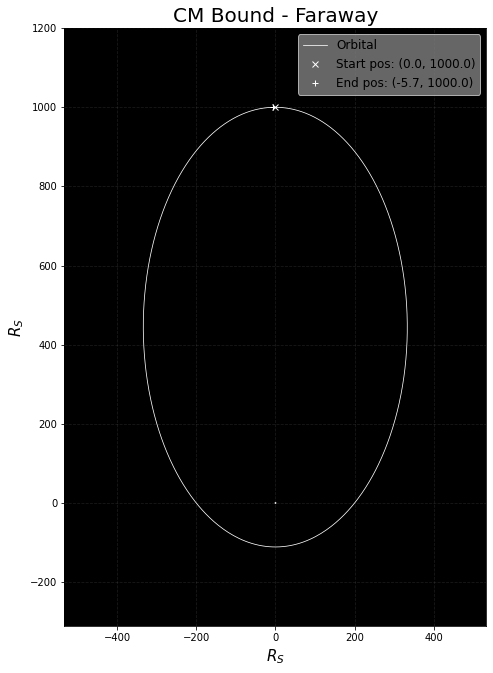

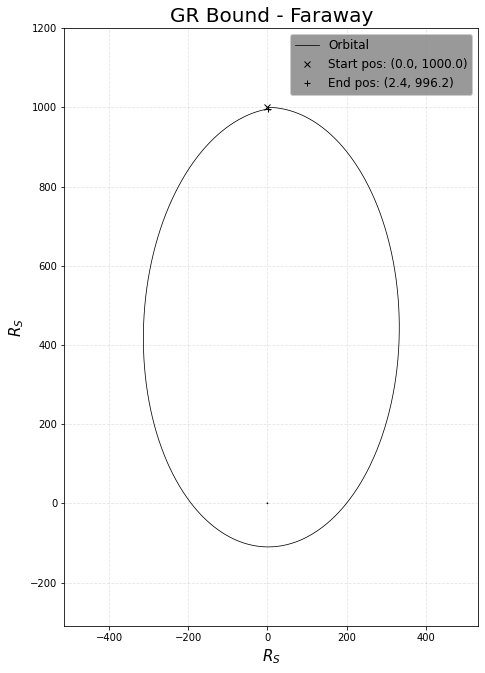

In [10]:
# CM Bound orbital, faraway starting pos
s1 = [0,1000,0.01,0]
pos1 = orbitals(s1, GR = False,t_max = 116000)[0]
orbPlot1 = orbPlotter(pos1,'CM Bound - Faraway', show = True)

# GR bound orbital, faraway starting pos, one round
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, t_max = 112000)[0]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True, show = True)

# Find a & b for CM case
a_CM = np.abs(max(pos1[1]) - min(pos1[1]))/2
b_CM = np.abs(max(pos1[0]) - min(pos1[0]))/2

# Find a & b for GR case
a_GR = np.abs(max(pos2[1]) - min(pos2[1]))/2
b_GR = np.abs(max(pos2[0]) - min(pos2[0]))/2

# Find how much the differ 
δa = np.abs(a_CM - a_GR)
δb = np.abs(b_CM - b_GR)


a_CM, b_CM, a_GR, b_GR
print(f'δa = {δa:.5f}, δb = {δb:.5f}')

The results of $\delta a \approx 0.6$ and $\delta b \approx 10.4$ are tiny compared to the size of the entire ellipse which is of the order $1000$. We suspect that the magnitude of $\delta b$ compared to $\delta a$ could be caused by the precession of the orbit in GR.

## Checking the precession
First we find the analytical value for the precession angle. The precession in our units is given by
    $$\Delta \phi = \frac{6 \pi G M}{\left( 1 - e^2 \right) a c^2} \quad \longrightarrow \quad \frac{3 \pi}{\left(1 - e^2 \right) \tilde a}$$
where $e = \sqrt{1 - b^2/a^2}$ is the eccentricity of the motion. This formula is calculated from the method of Post-Newtonian corrections, and thus the $\tilde a$ here is actually the $\tilde a$ from the Classical case. Let's take the case from before

In [11]:
# Taking the parameters of the motion from the CM case above
α = a_CM
β = b_CM
e = np.sqrt(1 - β**2/α**2)

# Calculating the analytically predicted value of the precession angle (in radians), and how many times it divides 2π radians.
Δφr = 3*np.pi/( (1 - e**2) * α)
angDiv = 2*np.pi/Δφr

Δφa = Δφr*360/(2*np.pi) #Convert to angles
print(f'Δφ (in radians) = {Δφr:.3f}, Δφ (in angles) = {Δφa:.3f}, Circle divisions = {angDiv:.0f}')

Δφ (in radians) = 0.047, Δφ (in angles) = 2.696, Circle divisions = 134


Now, to check whether this fits with our numerical model first we generate the GR scenario from the same boundary conditions and let it run for a full 360. Then we compile the distance to the origin at every point along the motion into an array. Then we use a function to find all the local extrema in the distances array. The total number of peaks is then the total number of orbitals in a full 360. We then compare this result to the number of circle divisions from the analytical solution.

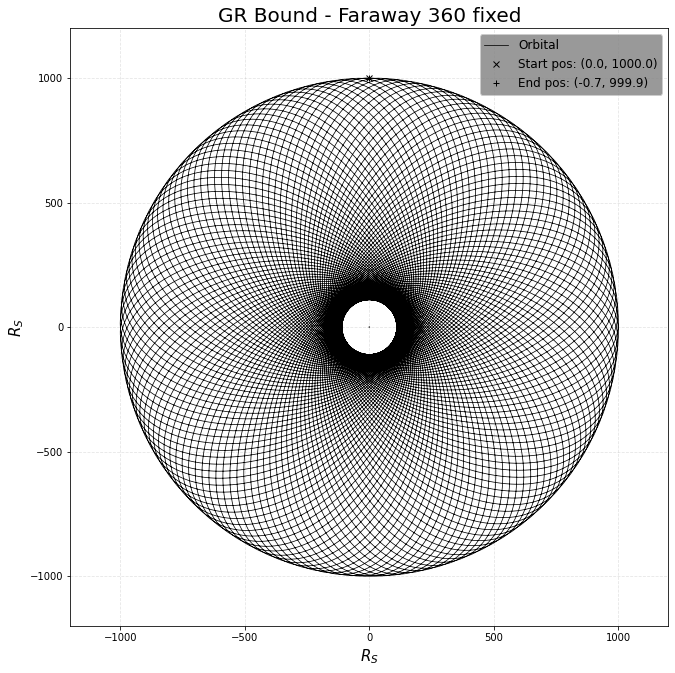

In [2]:
%run ./Orbital_functions_n.ipynb

# GR bound orbital, faraway starting pos, full 360
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, t_max = 1e7*1.55895)[0]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway 360 fixed', GR = True, show = True)
# prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway 360 fixed', GR = True)

In [13]:
from scipy.signal import argrelextrema, argrelmin

# Compiling the distances at every point of the motion in an array 
Ls = []
for i in range(len(pos2[0])):
    L = np.sqrt(pos2[0][i]**2 + pos2[1][i]**2)
    Ls.append(L)
Ls = np.array(Ls)

# Finding the number of peaks in the distances array
peaks = argrelextrema(Ls, np.less)
peaks = peaks[0]

# Adding one because the last peak is not counted
N = len(peaks)

print(f'The number of peaks in a full 360 is then {N}.')


The number of peaks in a full 360 is then 134.


This actually fits almost perfectly with the analytically calculated 134 circle divisions.

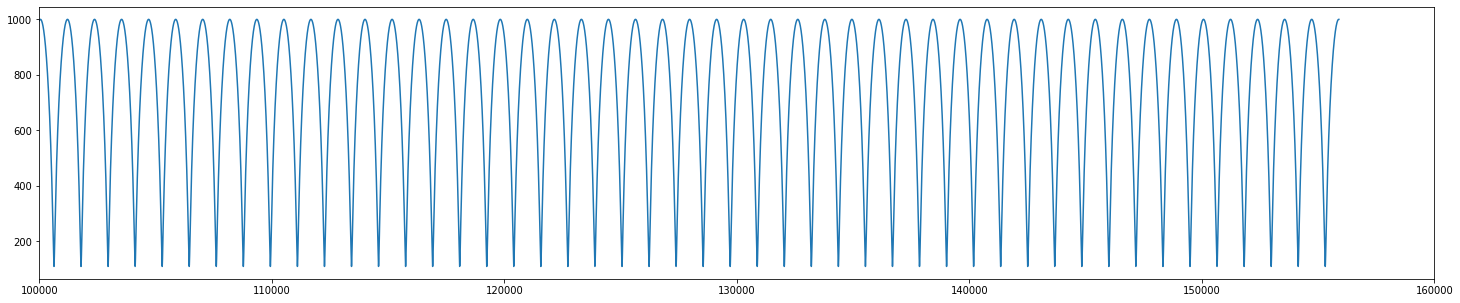

In [14]:
t = range(len(Ls))
fig, ax = plt.subplots(figsize=(25,5))
ax.set_xlim(1e5, 1.6e5)
ax.plot(t, Ls)


To check whether the discrepancy in the semi-minor axis $\delta b \approx 10.4$ is due to the precession of the orbit 

In [15]:
r0 = 1000
α = a_CM


ΔO = np.abs(r0 - α)* np.sin(Δφr)
Δb = ΔO/2
print(f'Δb = {Δb}')


Δb = 10.45208505679787


# Justifying the starting positions
From the analytical solution, we have that 

$$r = \frac{a (\varepsilon^2 - 1)}{1 - \varepsilon \cos \phi}, \qquad a = \frac{GM m}{2E}, \qquad \varepsilon = \sqrt{1 + \frac{2E l^2}{G^2 M^2 m^3}} $$

which in our variables is 

$$\tilde r = \frac{\tilde a (\tilde \varepsilon^2 - 1)}{1 - \tilde \varepsilon \cos \phi}, \qquad \tilde a = \frac{1}{4 \tilde E}, \qquad \tilde \varepsilon = \sqrt{1 + 8 \tilde E \tilde l^2}. $$

And $\tilde \varepsilon = \varepsilon$.

## Circular trajectory
### ANALYTICALLY
We find the circular orbit analytically by solving the equation
$$\frac{\partial V_\mathrm{eff}}{\partial r} = 0 \quad \longrightarrow \quad r = \frac{l^2}{GMm^2} \quad \longrightarrow \quad \tilde r = \frac{2 \tilde l^2}{\tilde m^2}.$$

### NUMERICALLY
To find the appropriate starting values to give our code, we choose the starting distance $\tilde r$ and then by the symmetry of our system, we rotate so that $\vec{\tilde r} = \tilde r \hat y$, and then be use the fact that
$$\tilde l = |\tilde r_x \tilde v_y - \tilde r_y  \tilde v_x| = \tilde r_y \tilde v_x \qquad \longrightarrow \qquad\tilde v_x = \tilde l/ \tilde r_y = \tilde l/ \tilde r$$

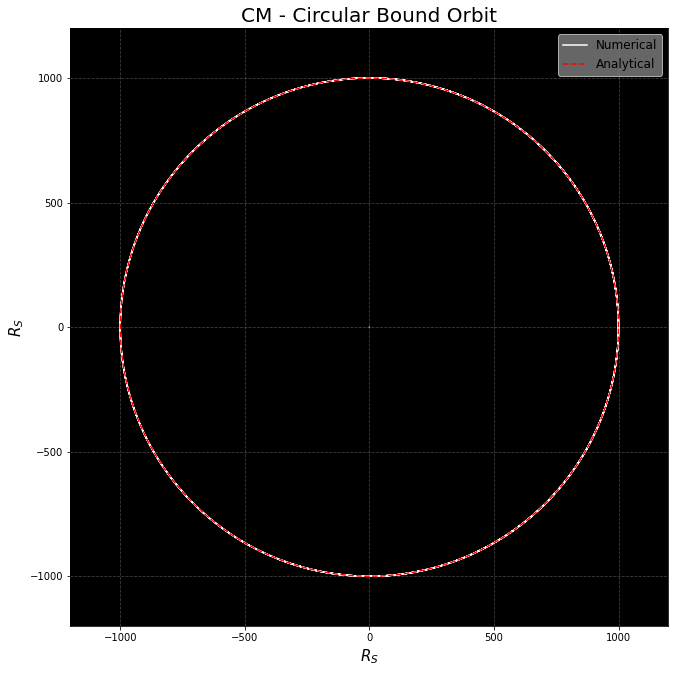

In [9]:

r = 1000
m = 1

l = np.sqrt(r*m**2/2)


# Calculating the analytical circle
φ = np.linspace(0,2*np.pi,100)
rx_an = r*np.cos(φ)
ry_an = r*np.sin(φ)


vx = l/r

tmax = 1000000
dt = 10

s = [0, r, vx, 0]
pos = orbitals(s, GR = False, t_max = tmax, dt=dt, RS = 1, d=3)[0]

start_pos = np.array([pos[0][0], pos[1][0]])
end_pos = np.array([pos[0][-1], pos[1][-1]])
    
xmax, xmin, ymax, ymin = findMaxPos(pos)
max_pos = max(max(abs(start_pos)),max(abs(end_pos)))

filename=f'CM - Circular Bound Orbit'
body1 = plt.Circle(xy=(0, 0), radius=RS, color='w')
fig, ax = plt.subplots(figsize=(11,11))

ax.set_xlim(xmin-0.2*max_pos, xmax+0.2*max_pos)
ax.set_ylim(ymin-0.2*max_pos, ymax+0.2*max_pos)

ax.plot(pos[0],pos[1], 'w', label = 'Numerical')
ax.plot(rx_an,ry_an, 'r--', label = 'Analytical')
ax.set_xlabel('$R_S$', fontsize = 15)
ax.set_ylabel('$R_S$', fontsize = 15)
ax.set_facecolor('k')
ax.grid(c='grey', alpha=0.5, ls ='--')
ax.set_aspect('equal')
ax.add_artist(body1)
ax.set_title(f'{filename}', fontsize = 20)
ax.legend(facecolor='grey',loc='upper right', fontsize = 12)

## Elliptical trajectory
For an elliptical trajectory we want $\varepsilon \in (0,1)$ which means that $\tilde E \in \left(- R_S^2/8 \tilde l^2, 0\right)$ and thus $\tilde p = \sqrt{2 |\tilde E|} \in (0, R_S/2 \tilde l)$. Thus, analogously to above we want

$$|\tilde v_x| \in \left(0,\ \frac{\sqrt 5}{100}\right)$$

corresponding to an energy $|\tilde E| \in \left(0, \, 2.5 \times 10^{-4}\right)$

## Elliptical trajectory
For an elliptical trajectory we want $\varepsilon \in (0,1)$ which means that $\tilde E \in \left(- R_S^2/8 \tilde l^2, 0\right)$ and thus $\tilde p = \sqrt{2 |\tilde E|} \in (0, R_S/2 \tilde l)$. Thus, analogously to above we want

$$|\tilde v_x| \in \left(0,\ \frac{\sqrt 5}{100}\right)$$

corresponding to an energy $|\tilde E| \in \left(0, \, 2.5 \times 10^{-4}\right)$

(WRITE SOMETHING)


and $\tilde E = 0$ we get

$$ \tilde p(\tilde E=-1/8) = \tilde v_x(\tilde E=-1/8) = 0.0261 \qquad \text{and} \qquad \tilde p(\tilde E=0) = 0.0223$$

corresponding to an energy $|\tilde E| = 10^{-2}$

In [10]:
ρx = 0
ρy = 1000
κ = 1
ρ = np.sqrt(ρx**2 + ρy**2)

tmax = 100000*2


P1 = np.sqrt(1/4)/100
E1 = P1**2/2
print(E1)
s1 = [ρx, ρy, P1, 0]
pos1 = orbitals(s1, GR = False, t_max = tmax*1.01, dt=1, RS = 1, d=10)[0]

P2 = np.sqrt(1/2)/100
E2 = P2**2/2
print(E2)
s2 = [ρx, ρy, P2, 0]
pos2 = orbitals(s2, GR = False, t_max = tmax*1.1, dt=1, RS = 1, d=10)[0]

P3 = np.sqrt(1)/100
E3 = P3**2/2
print(E3)
s3 = [ρx, ρy, P3, 0]
pos3 = orbitals(s3, GR = False, t_max = tmax*1.2, dt=1, RS = 1, d=10)[0]

P4 = np.sqrt(3)/100
E4 = P4**2/2
print(E4)
s4 = [ρx, ρy, P4, 0]
pos4 = orbitals(s4, GR = False, t_max = tmax*1.7, dt=1, RS = 1, d=10)[0]




1.25e-05
2.5e-05
5e-05
0.00015000000000000001


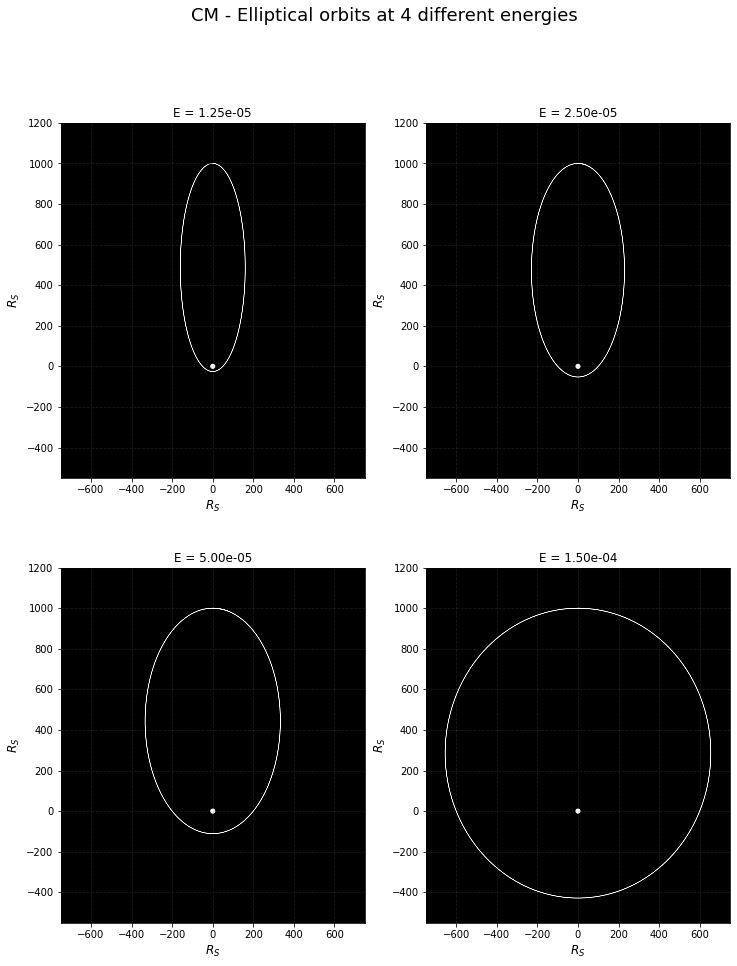

In [11]:
xLim = (-750, 750)
yLim = (-550,1200)
figSize = (12, 15)
RS = 10
bodyColor = 'w'
fontSize = 12
lineWidth = 0.5

body1 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)
body2 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)
body3 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)
body4 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)

fig, axs= plt.subplots(2, 2, figsize=figSize)
fig.suptitle('CM - Elliptical orbits at 4 different energies', fontsize = fontSize*1.5)
axs[0,0].plot(pos1[0], pos1[1], 'w', label = 'Orbital 1', linewidth = lineWidth)
axs[0,0].set_title(f'E = {E1:.2e}')
axs[0,0].set_xlim(xLim)
axs[0,0].set_ylim(yLim)
axs[0,0].set_xlabel('$R_S$', fontsize = fontSize)
axs[0,0].set_ylabel('$R_S$', fontsize = fontSize)
axs[0,0].set_facecolor('k')
axs[0,0].grid(c='grey', alpha=0.2, ls ='--')
axs[0,0].set_aspect('equal')
axs[0,0].add_artist(body1)

axs[0,1].plot(pos2[0], pos2[1], 'w', label = 'Orbital 2', linewidth = lineWidth)
axs[0,1].set_title(f'E = {E2:.2e}')
axs[0,1].set_xlim(xLim)
axs[0,1].set_ylim(yLim)
axs[0,1].set_xlabel('$R_S$', fontsize = fontSize)
axs[0,1].set_ylabel('$R_S$', fontsize = fontSize)
axs[0,1].set_facecolor('k')
axs[0,1].grid(c='grey', alpha=0.2, ls ='--')
axs[0,1].set_aspect('equal')
axs[0,1].add_artist(body2)

axs[1,0].plot(pos3[0], pos3[1], 'w', label = 'Orbital 3', linewidth = lineWidth)
axs[1,0].set_title(f'E = {E3:.2e}')
axs[1,0].set_xlim(xLim)
axs[1,0].set_ylim(yLim)
axs[1,0].set_xlabel('$R_S$', fontsize = fontSize)
axs[1,0].set_ylabel('$R_S$', fontsize = fontSize)
axs[1,0].set_facecolor('k')
axs[1,0].grid(c='grey', alpha=0.2, ls ='--')
axs[1,0].set_aspect('equal')
axs[1,0].add_artist(body3)

axs[1,1].plot(pos4[0], pos4[1], 'w', label = 'Orbital 4', linewidth = lineWidth)
axs[1,1].set_title(f'E = {E4:.2e}')
axs[1,1].set_xlim(xLim)
axs[1,1].set_ylim(yLim)
axs[1,1].set_xlabel('$R_S$', fontsize = fontSize)
axs[1,1].set_ylabel('$R_S$', fontsize = fontSize)
axs[1,1].set_facecolor('k')
axs[1,1].grid(c='grey', alpha=0.2, ls ='--')
axs[1,1].set_aspect('equal')
axs[1,1].add_artist(body4)

In [12]:
ρx = 0
ρy = 1000
κ = 1
ρ = np.sqrt(ρx**2 + ρy**2)

tmax = 1000000



P1 = np.sqrt(5)/100
E1 = P1**2/2
print(E1)
s1 = [ρx, ρy, P1, 0]
pos1 = orbitals(s1, GR = False, t_max = tmax*0.28, dt=1, RS = 1, d=5)[0]

P2 = np.sqrt(7)/100
E2 = P2**2/2
print(E2)
s2 = [ρx, ρy, P2, 0]
pos2 = orbitals(s2, GR = False, t_max = tmax*0.605, dt=1, RS = 1, d=5)[0]

P3 = np.sqrt(9)/100
E3 = P3**2/2
print(E3)
s3 = [ρx, ρy, P3, 0]
pos3 = orbitals(s3, GR = False, t_max = tmax*10, dt=1, RS = 1, d=5)[0]

P4 = np.sqrt(11)/100
E4 = P4**2/2
print(E4)
s4 = [ρx, ρy, P4, 0]
pos4 = orbitals(s4, GR = False, t_max = tmax*10, dt=1, RS = 1, d=5)[0]

0.00025
0.00035000000000000005
0.00045
0.00055


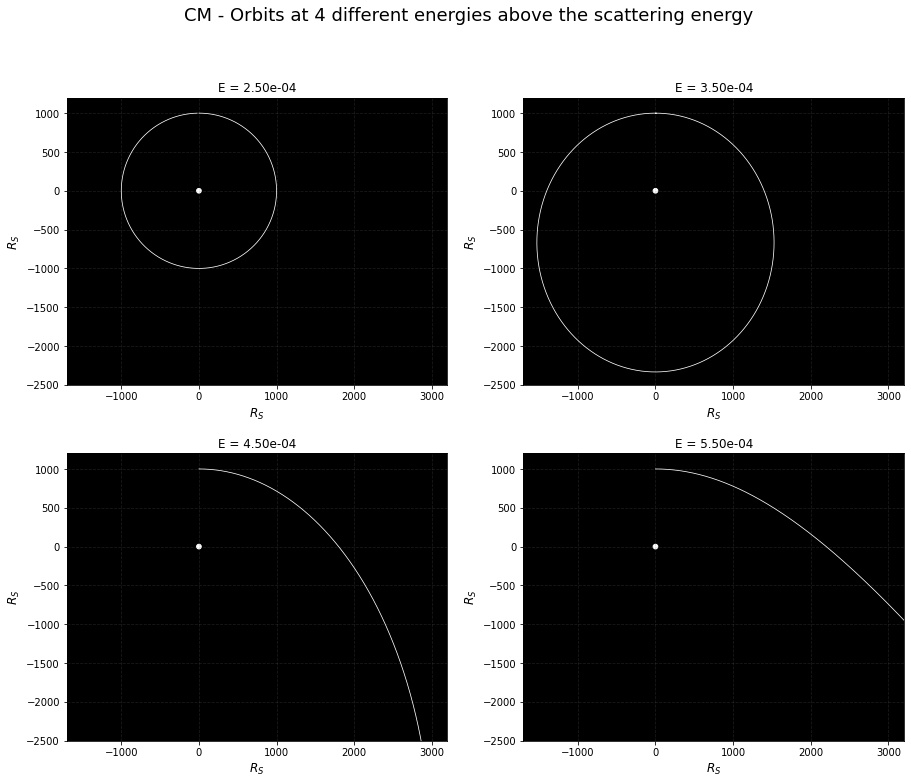

In [13]:
xLim = (-1700, 3200)
yLim = (-2500, 1200)
figSize = (15, 12)
RS = 30
bodyColor = 'w'
fontSize = 12
lineWidth = 0.75

body1 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)
body2 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)
body3 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)
body4 = plt.Circle(xy=(0, 0), radius=RS, color=bodyColor)

fig, axs= plt.subplots(2, 2, figsize=figSize)
fig.suptitle('CM - Orbits at 4 different energies above the scattering energy ', fontsize = fontSize*1.5)
axs[0,0].plot(pos1[0], pos1[1], 'w', label = 'Orbital 1', linewidth = lineWidth)
axs[0,0].set_title(f'E = {E1:.2e}')
axs[0,0].set_xlim(xLim)
axs[0,0].set_ylim(yLim)
axs[0,0].set_xlabel('$R_S$', fontsize = fontSize)
axs[0,0].set_ylabel('$R_S$', fontsize = fontSize)
axs[0,0].set_facecolor('k')
axs[0,0].grid(c='grey', alpha=0.2, ls ='--')
axs[0,0].set_aspect('equal')
axs[0,0].add_artist(body1)

axs[0,1].plot(pos2[0], pos2[1], 'w', label = 'Orbital 2', linewidth = lineWidth)
axs[0,1].set_title(f'E = {E2:.2e}')
axs[0,1].set_xlim(xLim)
axs[0,1].set_ylim(yLim)
axs[0,1].set_xlabel('$R_S$', fontsize = fontSize)
axs[0,1].set_ylabel('$R_S$', fontsize = fontSize)
axs[0,1].set_facecolor('k')
axs[0,1].grid(c='grey', alpha=0.2, ls ='--')
axs[0,1].set_aspect('equal')
axs[0,1].add_artist(body2)

axs[1,0].plot(pos3[0], pos3[1], 'w', label = 'Orbital 3', linewidth = lineWidth)
axs[1,0].set_title(f'E = {E3:.2e}')
axs[1,0].set_xlim(xLim)
axs[1,0].set_ylim(yLim)
axs[1,0].set_xlabel('$R_S$', fontsize = fontSize)
axs[1,0].set_ylabel('$R_S$', fontsize = fontSize)
axs[1,0].set_facecolor('k')
axs[1,0].grid(c='grey', alpha=0.2, ls ='--')
axs[1,0].set_aspect('equal')
axs[1,0].add_artist(body3)

axs[1,1].plot(pos4[0], pos4[1], 'w', label = 'Orbital 4', linewidth = lineWidth)
axs[1,1].set_title(f'E = {E4:.2e}')
axs[1,1].set_xlim(xLim)
axs[1,1].set_ylim(yLim)
axs[1,1].set_xlabel('$R_S$', fontsize = fontSize)
axs[1,1].set_ylabel('$R_S$', fontsize = fontSize)
axs[1,1].set_facecolor('k')
axs[1,1].grid(c='grey', alpha=0.2, ls ='--')
axs[1,1].set_aspect('equal')
axs[1,1].add_artist(body4)